##  data - composition

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os, sys, string

sc.set_figure_params(vector_friendly=False, fontsize=18)

import pandas as pd
import numpy as np

import anndata

from scipy.io import mmwrite

import matplotlib.pyplot as plt
from collections import Counter

from typing import Tuple, Union, List, Dict, Callable
import os
import gzip
import shutil
import inspect
import h5py
from matplotlib.pyplot import rc_context

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def makedirs(dirpath):
    if not os.path.exists(dirpath):
        os.system("mkdir "+ dirpath)

In [3]:
home      = "/Users/shayat/Documents/Aachen/projects/training_gcb2023/"
datahome  = home+ "data/"
resulthome= home+ "results/"

In [4]:
makedirs(home)
makedirs(datahome)
makedirs(resulthome)

In [5]:
cluster_file = "snRNA-seq-submission_training_scleaned_r1_2023.h5ad"

## START

In [6]:
adata = sc.read_h5ad(datahome+cluster_file)

In [7]:
adata

AnnData object with n_obs × n_vars = 38825 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'leiden0.7'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'major_labl_colors', 'rank_genes_groups0.7', 'sample_colors'
    obsm: 'X_harmony', 'X_pca', 'X_pca_harmony', 'X_umap'

In [8]:
cluster_file

'snRNA-seq-submission_training_scleaned_r1_2023.h5ad'

In [9]:
cluster_key = 'cell_type_original'
myclusters  = adata.obs[cluster_key].drop_duplicates().values.tolist()

In [11]:
#adata = adata[~adata.obs[cluster_key].isin(clusters_to_delete)].copy()

In [12]:
adata

AnnData object with n_obs × n_vars = 38825 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'leiden0.7'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'major_labl_colors', 'rank_genes_groups0.7', 'sample_colors'
    obsm: 'X_harmony', 'X_pca', 'X_pca_harmony', 'X_umap'

In [13]:
#plot_umap(adata, "black", "aging kidney")

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


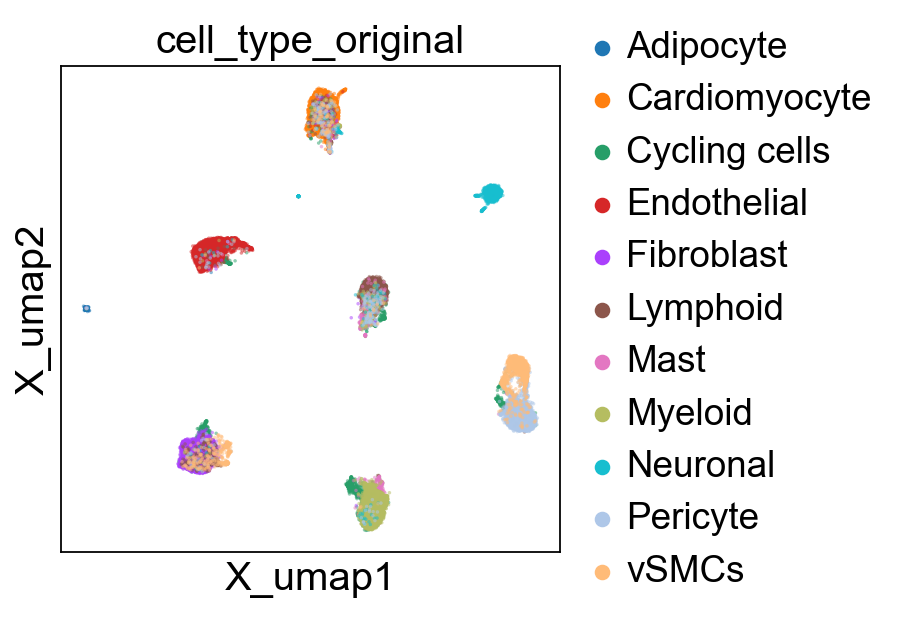

In [14]:
# check out how it looks by sample
plt.figure(figsize=(4, 4))
sc.pl.embedding(adata, basis='X_umap', color=cluster_key, ax=plt.gca(), size=10, alpha=0.5)

In [15]:
#append_scrublet_to_adata(adata, sample_key="ident")

In [16]:
Counter(adata.obs["major_labl"])

Counter({'CTRL': 7073, 'FZ': 8159, 'BZ': 4836, 'IZ': 9110, 'RZ': 9647})

In [17]:
res = 1.1

In [18]:
#Counter(adata.var["highly_variable"])

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


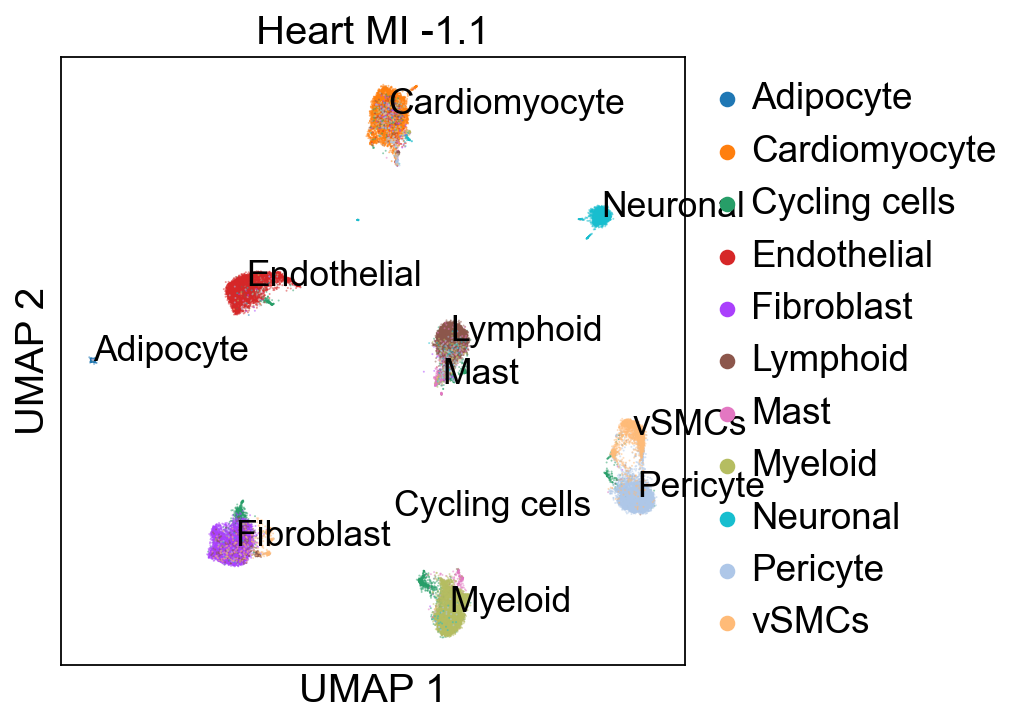

In [20]:
# show clustering with numbers
#res = 0.1

plt.figure(figsize=(5, 5))
sc.pl.embedding(adata, basis='umap', color=cluster_key, ax=plt.gca(), alpha=0.5, show=False)

df = pd.DataFrame(adata.obsm['X_umap'])
df['cluster'] = adata.obs[cluster_key].values
mean_pos = df.groupby('cluster').median()

for c in mean_pos.index:    
    plt.gca().text(mean_pos.loc[c][0], mean_pos.loc[c][1], c.split(':')[0], 
                   fontsize=16, color='black')

# plt.tight_layout()
# fig.savefig(fig_prefix + '_umap_' + key + '.pdf', bbox_inches='tight')

plt.title('Heart MI -' + str(res))
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.show()

In [21]:
print(adata.obs.columns.tolist())

['sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'leiden0.7']


## Run scCODA

In [22]:
import altair as alt
import pertpy as pt

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

2023-09-10 00:51:53.749557: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Global seed set to 0
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightni

In [23]:
print(anndata.__version__)
print(sc.__version__)
print(h5py.__version__)
print(pt.__version__)

0.8.0
1.9.2
3.8.0
0.4.0


In [24]:
#!pip install pertpy
#!pip install ete3
###!pip3 install --force-reinstall pertpy==0.3.0 ## Not needed

In [25]:
#from pertpy.tools._coda import coda
from pertpy.tools._coda._sccoda import Sccoda
from pertpy.plot._coda import CodaPlot as coda

In [26]:
#adata = pt.dt.haber_2017_regions()

In [27]:
adata

AnnData object with n_obs × n_vars = 38825 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'leiden0.7'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'major_labl_colors', 'rank_genes_groups0.7', 'sample_colors'
    obsm: 'X_harmony', 'X_pca', 'X_pca_harmony', 'X_umap'

In [28]:
adata.obs.head(3)

,sample,n_counts,n_genes,percent_mito,doublet_score,dissociation_score,cell_type_original,patient_region_id,patient,patient_group,...,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,scrublet,leiden0.1,leiden0.3,leiden0.5,leiden0.7
ACACCAAGTGTCATGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK158,9255.0,4157,0.086440,0.478381,0.127749,Adipocyte,control_P1,P1,myogenic,...,0,4157,9255.0,8.0,0.086440,0.375723,7,7,8,8
GTAGGAGTCCGTATAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK158,5917.0,1540,0.033801,0.112845,-0.017195,Adipocyte,control_P1,P1,myogenic,...,0,1539,5914.0,2.0,0.033818,0.092742,3,3,2,3
ACCTGTCGTCTACAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK159,4226.0,2238,0.189304,0.333294,0.030336,Adipocyte,RZ/FZ_P5,P5,myogenic,...,0,2238,4226.0,8.0,0.189304,0.315217,3,3,2,3


In [29]:
#adata.obs['subcluster_name'] = adata.obs['main_class'].astype(str) + '_' + adata.obs['subcluster'].astype(str)

In [30]:
adata.obs[[cluster_key]].drop_duplicates().sort_values(by=cluster_key).tail(20)

,cell_type_original
ACACCAAGTGTCATGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0,Adipocyte
GGGATCCGTCACAGTT-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-1,Cardiomyocyte
AACCACAGTGGAAGTC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-2,Cycling cells
CTGTAGATCACCTCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1-3,Endothelial
CGTAGTACACGCGCTA-1_1_1_1_1_1_1_1_1_1_1_1-4,Fibroblast
CTTCAATCAATCCAGT-1_2-5,Lymphoid
AAAGGATTCGTTCAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-6,Mast
AGTTCCCTCTCGCTTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1-7,Myeloid
AAACGCTCAGAACTTC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-8,Neuronal
GACAGCCCAATGTGGG-1_2_1_1_1_1_1_1_1_1-9,Pericyte


In [31]:
#adata = adata[adata.obs['main_class'].isin(['PTs', 'aPT_dTL'])].copy()

In [32]:
adata

AnnData object with n_obs × n_vars = 38825 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'leiden0.7'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'major_labl_colors', 'rank_genes_groups0.7', 'sample_colors'
    obsm: 'X_harmony', 'X_pca', 'X_pca_harmony', 'X_umap'

In [36]:
adata.obs[['sample', 'patient', 'major_labl']].drop_duplicates().sort_values(by='patient')

,sample,patient,major_labl
ACACCAAGTGTCATGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK158,P1,CTRL
CCTCAACGTACTCGTA-1_2_1_1_1_1_1_1_1_1_1_1_1-0,CK163,P2,BZ
TTTACGTGTTGCGGCT-1_2_1_1_1_1_1_1_1_1_1_1-0,CK165,P2,IZ
ACTCTCGTCCGCGAGT-1_2_1_1_1_1_1_1_1_1-0,CK359,P2,RZ
AAAGTCCCATCATCTT-1_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK160,P3,BZ
ACTGATGGTACCTAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1-0,CK161,P3,IZ
AACAAAGCAGAGAGGG-1_1_1_1_1_1_1_1_1_1_1_1-0,CK164,P3,RZ
AAAGGGCTCATAGCAC-1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK162,P4,FZ
ACCTGTCGTCTACAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK159,P5,FZ
AGGTAGGCAGAGTGAC-1_1_1_1_1_1_1_1_1_1_1-0,CK356,P6,RZ


In [37]:
sccoda_model = Sccoda()
sccoda_data  = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier=cluster_key,
    sample_identifier="sample",
    covariate_obs=["major_labl"],
)
sccoda_data

MuData object with n_obs × n_vars = 38854 × 27603
  var:	'n_cells'
  2 modalities
    rna:	38825 x 27592
      obs:	'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'leiden0.7', 'scCODA_sample_id'
      var:	'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'cell_type_original_colors', 'major_labl_colors', 'rank_genes_groups0.7', 'sample_colors'
      obsm:	'X_harmony', 'X_pca', 'X_pca_harmony', 'X_umap'
    coda:	29 x 11
      obs:	'major_labl', 'sample'
      var:	'n_cells'

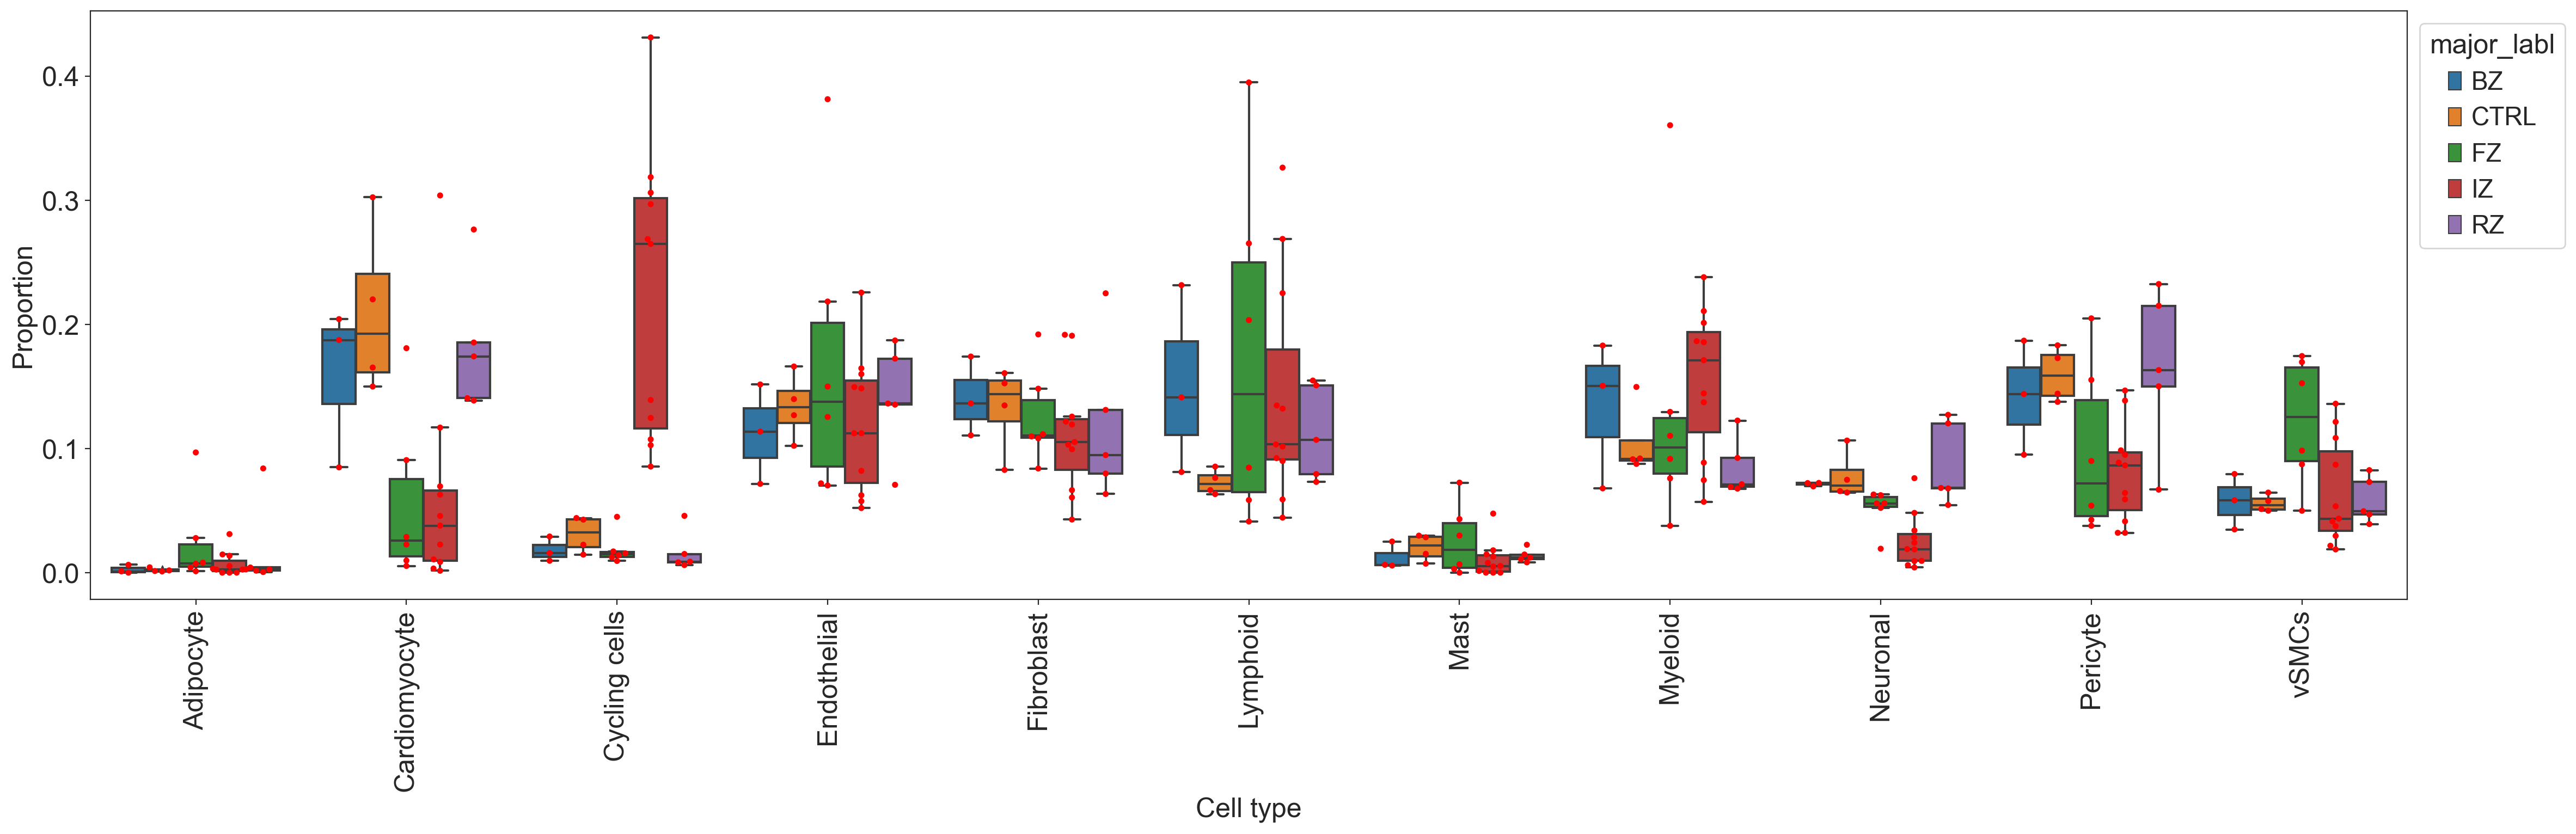

In [38]:
coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="major_labl",
    figsize=(24, 8),
    add_dots=True,
    plot_facets= False,
    cmap = "tab10",
    args_swarmplot={"palette": ["Red"], "size": 4, "linewidth": 0},
)
plt.show()

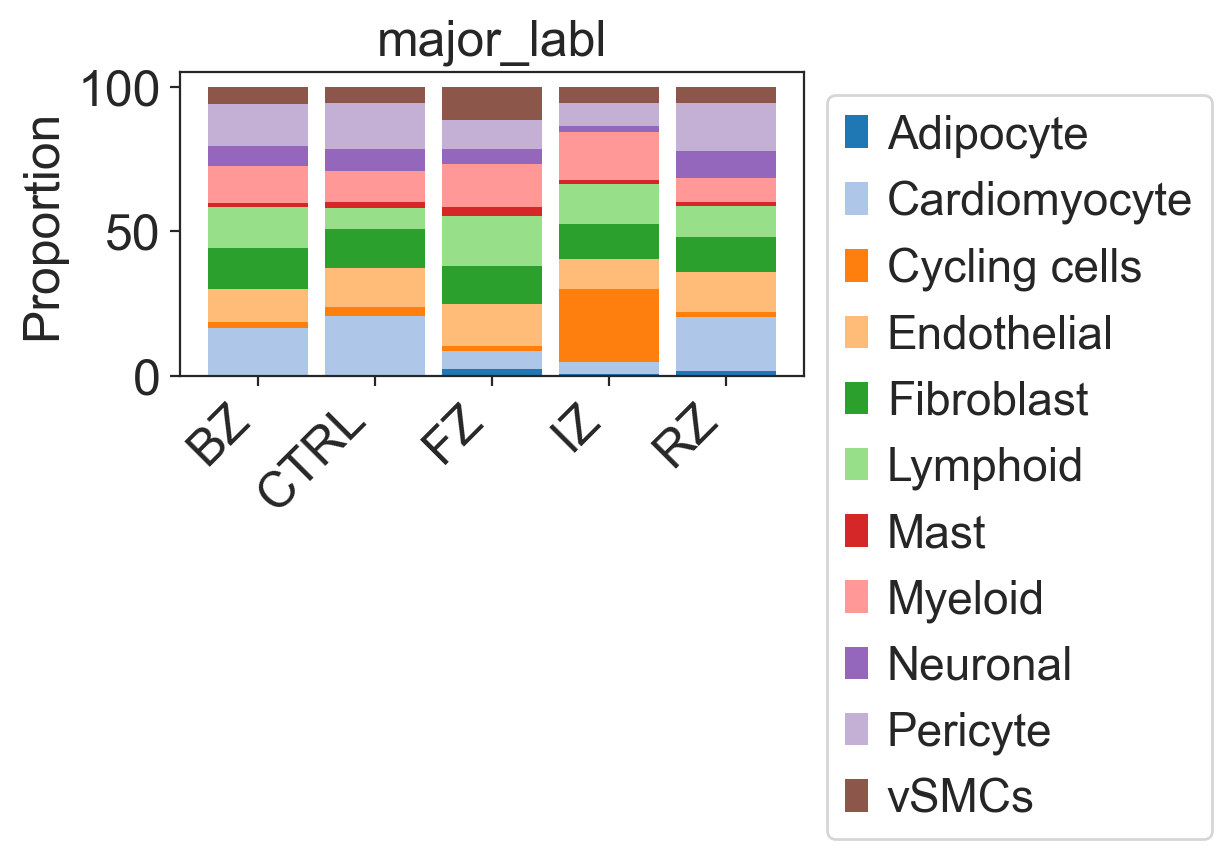

In [39]:
coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="major_labl", figsize=(4, 2)
)
plt.show()

In [40]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="major_labl",
    reference_cell_type="Adipocyte",
)
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11000/11000 [03:44<00:00, 48.94it/s, 511 steps of size 1.16e-02. acc. prob=0.91]


In [42]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 29 × 11
    obs: 'major_labl', 'sample'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_major_labl[T.CTRL]', 'effect_df_major_labl[T.FZ]', 'effect_df_major_labl[T.IZ]', 'effect_df_major_labl[T.RZ]'

In [44]:
sccoda_data["coda"].varm["effect_df_major_labl[T.FZ]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
Adipocyte,0.000000,0.000,0.000,0.000,0.0000,19.878753,0.360615
Cardiomyocyte,-1.560274,-2.209,-0.921,0.348,0.9978,63.521439,-1.890385
Cycling cells,0.000000,-0.959,0.367,0.262,0.4088,47.877778,0.360615
Endothelial,0.000000,-0.600,0.320,0.140,0.3027,210.745549,0.360615
Fibroblast,0.000000,-0.715,0.208,0.188,0.3682,202.684681,0.360615
Lymphoid,0.000000,-0.559,0.291,0.132,0.2977,194.932136,0.360615
Mast,0.000000,-0.780,0.581,0.224,0.3632,33.806445,0.360615
Myeloid,0.000000,-0.792,0.168,0.229,0.4454,194.348215,0.360615
Neuronal,0.000000,-1.155,0.030,0.381,0.7362,136.817986,0.360615


In [45]:
sccoda_data

MuData object with n_obs × n_vars = 38854 × 27603
  var:	'n_cells'
  2 modalities
    rna:	38825 x 27592
      obs:	'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'leiden0.7', 'scCODA_sample_id'
      var:	'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'cell_type_original_colors', 'major_labl_colors', 'rank_genes_groups0.7', 'sample_colors'
      obsm:	'X_harmony', 'X_pca', 'X_pca_harmony', 'X_umap'
    coda:	29 x 11
      obs:	'major_labl', 'sample'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_major_labl[T.CTRL]', 'effect_df_major_labl[T.FZ]', 'effect_df_major_labl[T.IZ]', 'effect_df_major_labl[T.RZ]'

In [46]:
#sccoda_model.set_fdr(sccoda_data, 0.2)
sccoda_model.set_fdr(sccoda_data, 0.05)

In [47]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate           Cell Type    
major_labl[T.CTRL]  Adipocyte        False
                    Cardiomyocyte    False
                    Cycling cells    False
                    Endothelial      False
                    Fibroblast       False
                    Lymphoid         False
                    Mast             False
                    Myeloid          False
                    Neuronal         False
                    Pericyte         False
                    vSMCs            False
major_labl[T.FZ]    Adipocyte        False
                    Cardiomyocyte     True
                    Cycling cells    False
                    Endothelial      False
                    Fibroblast       False
                    Lymphoid         False
                    Mast             False
                    Myeloid          False
                    Neuronal         False
                    Pericyte          True
                    vSMCs            False
major_labl[T.IZ]    

In [48]:
test_df = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame().reset_index()

In [49]:
test_df[test_df['Final Parameter']== True].head(30)

,Covariate,Cell Type,Final Parameter
12,major_labl[T.FZ],Cardiomyocyte,True
20,major_labl[T.FZ],Pericyte,True
23,major_labl[T.IZ],Cardiomyocyte,True
24,major_labl[T.IZ],Cycling cells,True
30,major_labl[T.IZ],Neuronal,True
31,major_labl[T.IZ],Pericyte,True


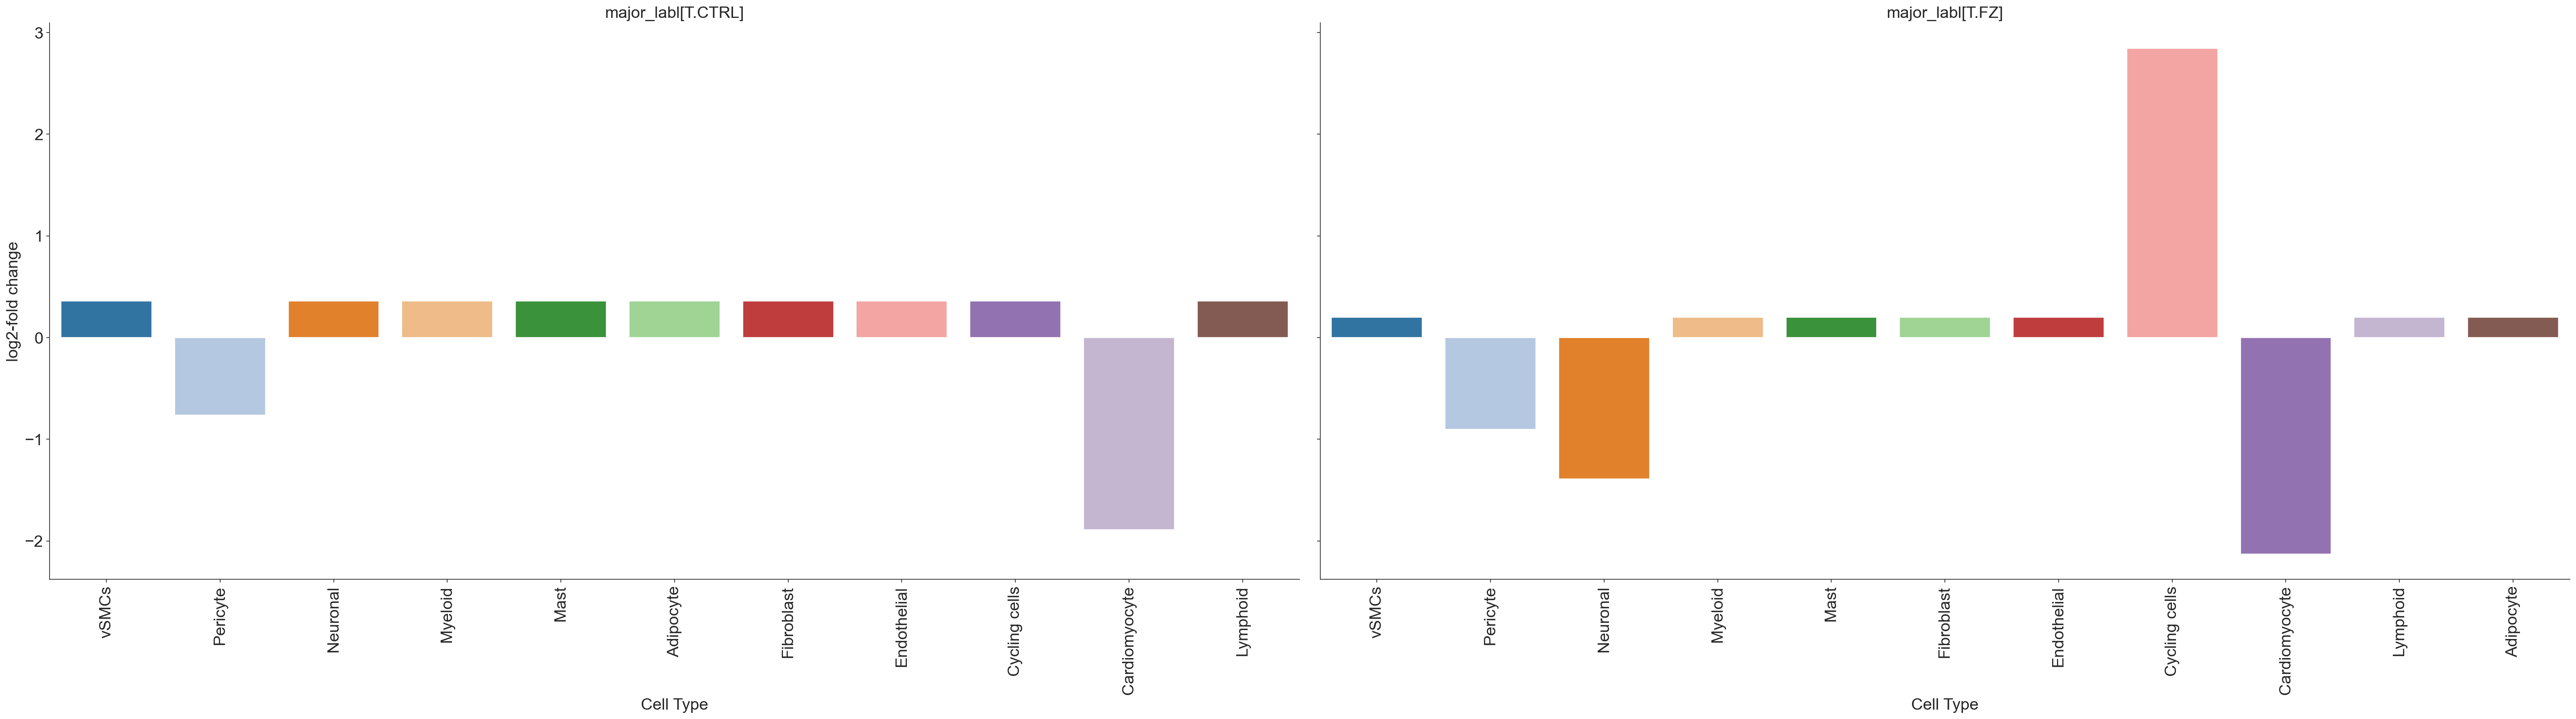

In [51]:
coda.effects_barplot(sccoda_data, "coda", "major_labl", figsize=(10, 20))
plt.show()